In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [35]:
df = pd.read_csv('/content/stunting_wasting_dataset (2).csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [37]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [38]:
#cek duplicat
df.duplicated().sum()

np.int64(7308)

In [39]:
df = df.drop_duplicates()

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df = df.rename(columns={
    'Jenis Kelamin ' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting':'wasting'
})

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jenis Kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


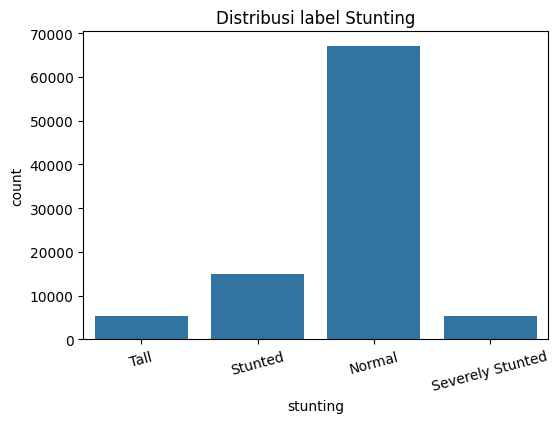

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')

plt.xticks(rotation =15)
plt.show()

In [44]:
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)
df['stunting'] =stunting_cat.cat.codes
for col in ['jenis_kelamin','wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,Jenis Kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,Laki-laki,19,91.6,13.3,3,1
1,Laki-laki,20,77.7,8.5,2,3
2,Laki-laki,10,79.0,10.3,0,1
3,Perempuan,2,50.3,8.3,1,1
4,Perempuan,5,56.4,10.9,1,1


In [45]:
df.head()

,Jenis Kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,Laki-laki,19,91.6,13.3,3,1
1,Laki-laki,20,77.7,8.5,2,3
2,Laki-laki,10,79.0,10.3,0,1
3,Perempuan,2,50.3,8.3,1,1
4,Perempuan,5,56.4,10.9,1,1


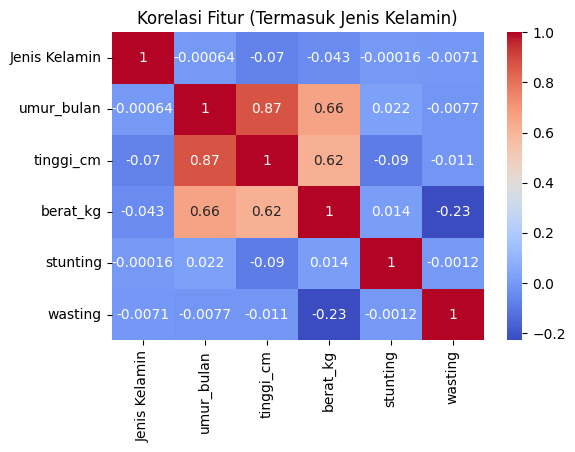

In [46]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Buat salinan data agar data asli tidak berubah
df_encoded = df.copy()

# Ubah semua kolom kategorik (object/string) jadi angka
label_encoder = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Visualisasi heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur (Termasuk Jenis Kelamin)')
plt.show()


In [47]:
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']  # ✅ perbaiki typo: ture_cols → feature_cols

# Gunakan daftar kolom untuk ambil data dari df
X = df[feature_cols]     # ✅ ambil kolom sesuai daftar
y = df['stunting']       # target variabel


In [48]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(74153, 18539)

In [53]:
dt =DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

In [50]:
y_pred = dt.predict(X_test)
print('Akurasi:', round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
stunting_classes = ['Normal', 'Severely Stunted', 'Stunted', 'Tall']

print("\nClassification Report:\n", classification_report(
    y_test,
    y_pred,
    target_names=stunting_classes if len(set(y_test)) == len(stunting_classes) else None
))

Akurasi: 90.52 %

Confusion Matrix:
 [[12848     0   402   250]
 [    0   812   219     0]
 [  426   225  2300     0]
 [  236     0     0   821]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.95      0.95      0.95     13500
Severely Stunted       0.78      0.79      0.79      1031
         Stunted       0.79      0.78      0.78      2951
            Tall       0.77      0.78      0.77      1057

        accuracy                           0.91     18539
       macro avg       0.82      0.82      0.82     18539
    weighted avg       0.91      0.91      0.91     18539



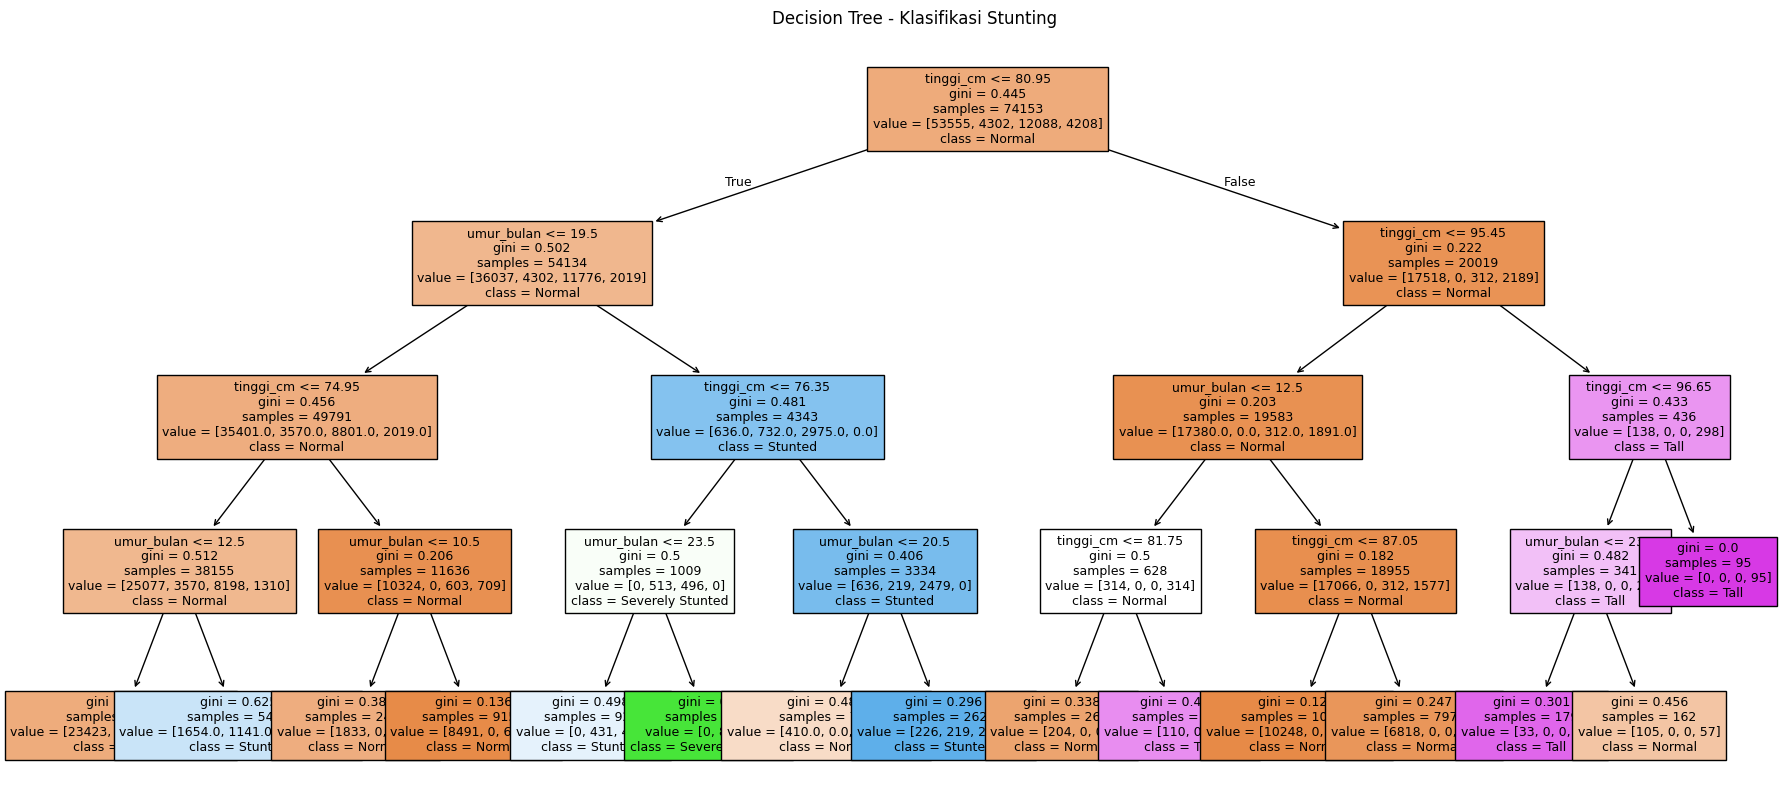

In [54]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,      # daftar kolom fitur (sudah didefinisikan sebelumnya)
    class_names=stunting_classes,    # daftar nama kelas dalam bentuk string
    filled=True,                     # memberi warna berdasarkan kelas
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()


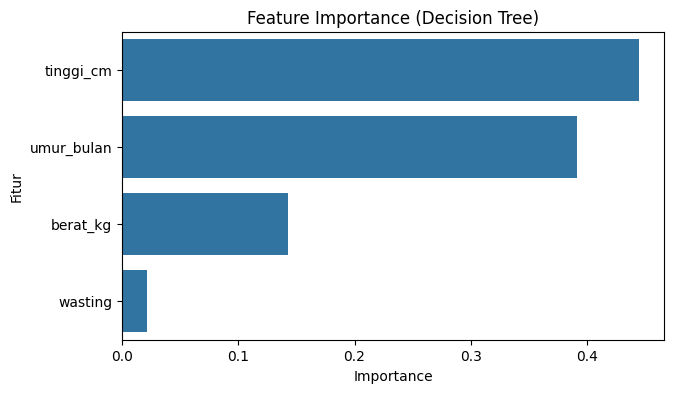

,0
tinggi_cm,0.444235
umur_bulan,0.391421
berat_kg,0.143185
wasting,0.021159


In [51]:

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp


In [52]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")


Best max_depth: 8 | Acc: 83.98 %
